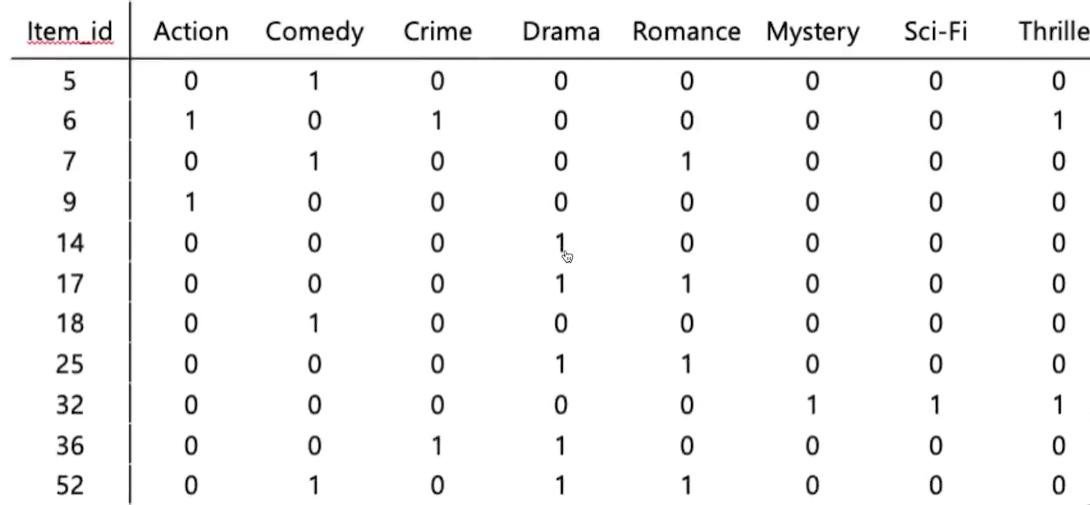

In [1]:
import pandas as pd
import numpy as np
import math

## Item Similarity

### Weight Matrix

In [2]:
matrix = np.array(
    [
        [0, 1, 0, 0, 0, 0, 0, 0],
        [1, 0, 1, 0, 0, 0, 0, 1],
        [0, 1, 0, 0, 1, 0, 0, 0],
        [1, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 1, 0, 0, 0, 0],
        [0, 0, 0, 1, 1, 0, 0, 0],
        [0, 1, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 1, 1, 0, 0, 0],
        [0, 0, 0, 0, 0, 1, 1, 1],
        [0, 0, 1, 1, 0, 0, 0, 0],
        [0, 1, 0, 1, 1, 0, 0, 0]
    ]
)

print("Items : ", matrix.shape[0])
print("Genres: ", matrix.shape[1])

Items :  11
Genres:  8


In [5]:
totalitems = matrix.shape[0]
totalGenres = matrix.shape[1]

weight = np.zeros(matrix.shape)

for i in range(0, totalGenres):
    col = matrix[:,i]
    df = col.sum()
    idf = math.log10(totalitems/df)
    print(df)
    print(idf)
    print(col)

2
0.7403626894942439
[0 1 0 1 0 0 0 0 0 0 0]
4
0.43933269383026263
[1 0 1 0 0 0 1 0 0 0 1]
2
0.7403626894942439
[0 1 0 0 0 0 0 0 0 1 0]
5
0.3424226808222063
[0 0 0 0 1 1 0 1 0 1 1]
4
0.43933269383026263
[0 0 1 0 0 1 0 1 0 0 1]
1
1.041392685158225
[0 0 0 0 0 0 0 0 1 0 0]
1
1.041392685158225
[0 0 0 0 0 0 0 0 1 0 0]
2
0.7403626894942439
[0 1 0 0 0 0 0 0 1 0 0]


In [7]:
totalitems = matrix.shape[0]
totalGenres = matrix.shape[1]

weight = np.zeros(matrix.shape)

for i in range(0, totalGenres):
    col = matrix[:,i]
    df = col.sum()
    idf = math.log10(totalitems/df)
    for j in range(0, totalitems):
        weight[j,i] = matrix[j,i] *idf

In [8]:
weight

array([[0.        , 0.43933269, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.74036269, 0.        , 0.74036269, 0.        , 0.        ,
        0.        , 0.        , 0.74036269],
       [0.        , 0.43933269, 0.        , 0.        , 0.43933269,
        0.        , 0.        , 0.        ],
       [0.74036269, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.34242268, 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.34242268, 0.43933269,
        0.        , 0.        , 0.        ],
       [0.        , 0.43933269, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.34242268, 0.43933269,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        1.04139269, 1.041392

### $l_2$-norm
Let's define norm2 function for computing l2-norm of a vector, which is represented as an array in np.

$$norm2(v)=||v||_2=\sqrt{\sum_{\forall i}v_i^2}$$

In [9]:
def norm2(arr):
    sum = 0.0
    for i in range(0, len(arr)):
        sum += arr[i] * arr[i]
    return math.sqrt(sum)


In [10]:
print(weight[0], "=>", norm2(weight[0]))
print(weight[1], "=>", norm2(weight[1]))

[0.         0.43933269 0.         0.         0.         0.
 0.         0.        ] => 0.43933269383026263
[0.74036269 0.         0.74036269 0.         0.         0.
 0.         0.74036269] => 1.282345794232371


### Inner Product

Let's define dot function for computin inner product between two vectors.

$$dot(u, v)=u\cdot v=\sum_{\forall i}{u_i \times v_i}$$

In [11]:
def dot(arr1, arr2):
    sum = 0.0
    for i in range(0, len(arr1)):
        sum += arr1[i] * arr2[i]
    return sum

In [12]:
print(dot(weight[0], weight[1]))
print(dot(weight[0], weight[2]))
print(dot(weight[0], weight[3]))

0.0
0.19301321586815529
0.0


### Cosine Similarity

Let's define cosine similarity function for two vectors.

$$ cosine(u, v)=\frac{dot(u,v)}{norm2(u)norm2(v)}=\frac{u\cdot v}{||u||_2||v||_2} $$

In [13]:
def cosine(arr1, arr2):
    return dot(arr1, arr2) / (norm2(arr1)*norm2(arr2))

In [15]:
print(cosine(weight[0], weight[1]))
print(cosine(weight[0], weight[2]))
print(cosine(weight[0], weight[3]))

0.0
0.7071067811865475
0.0


## Numpy 활용하기

In [17]:
from numpy import linalg as LA

In [19]:
norms =  LA.norm(weight, ord=2, axis=1)
norms

array([0.43933269, 1.28234579, 0.62131025, 0.74036269, 0.34242268,
       0.55701572, 0.43933269, 0.55701572, 1.64837325, 0.81571454,
       0.70942211])

In [20]:
dots = np.matmul(weight, weight.T)
dots

array([[0.19301322, 0.        , 0.19301322, 0.        , 0.        ,
        0.        , 0.19301322, 0.        , 0.        , 0.        ,
        0.19301322],
       [0.        , 1.64441074, 0.        , 0.54813691, 0.        ,
        0.        , 0.        , 0.        , 0.54813691, 0.54813691,
        0.        ],
       [0.19301322, 0.        , 0.38602643, 0.        , 0.        ,
        0.19301322, 0.19301322, 0.19301322, 0.        , 0.        ,
        0.38602643],
       [0.        , 0.54813691, 0.        , 0.54813691, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.11725329,
        0.11725329, 0.        , 0.11725329, 0.        , 0.11725329,
        0.11725329],
       [0.        , 0.        , 0.19301322, 0.        , 0.11725329,
        0.31026651, 0.        , 0.31026651, 0.        , 0.11725329,
        0.31026651],
       [0.19301322, 0.        , 0.19301322, 0.        , 0.

In [21]:
sims = np.divide(np.divide(dots, norms).T, norms)
sims

array([[1.        , 0.        , 0.70710678, 0.        , 0.        ,
        0.        , 1.        , 0.        , 0.        , 0.        ,
        0.6192825 ],
       [0.        , 1.        , 0.        , 0.57735027, 0.        ,
        0.        , 0.        , 0.        , 0.25931542, 0.52401738,
        0.        ],
       [0.70710678, 0.        , 1.        , 0.        , 0.        ,
        0.5577134 , 0.70710678, 0.5577134 , 0.        , 0.        ,
        0.87579771],
       [0.        , 0.57735027, 0.        , 1.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , 0.        , 1.        ,
        0.6147451 , 0.        , 0.6147451 , 0.        , 0.41978249,
        0.48267834],
       [0.        , 0.        , 0.5577134 , 0.        , 0.6147451 ,
        1.        , 0.        , 1.        , 0.        , 0.25805923,
        0.78516825],
       [1.        , 0.        , 0.70710678, 0.        , 0.

In [22]:
sims[0]

array([1.        , 0.        , 0.70710678, 0.        , 0.        ,
       0.        , 1.        , 0.        , 0.        , 0.        ,
       0.6192825 ])